# Hist

In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [2]:
# Data=pd.read_csv('1000_sample.csv')
# X = Data[Data.columns[1:23]]
# y = Data[ Data.columns[23]]
# # X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)

# # plt.figure()
# # ind = np.arange(len(y)) 
# # plt.scatter(ind,y, color="b",label="Training")
# # ind = np.arange(len(y_Test))
# # plt.scatter(ind,y_Test, color="r",label="Test")
# # plt.title("Unseen")
# # plt.xlabel("Actual")
# # plt.ylabel("pred")
# # plt.legend(loc="best")
# # plt.show()

# # plt.figure(figsize=(17, 8))
# # sns.distplot(y,hist=True,color='k',hist_kws=dict(color='dimgray',edgecolor="dimgray", linewidth=2),label='Train')
# # sns.distplot(y_Test,hist=True,color='r',hist_kws=dict(color='salmon',edgecolor="salmon", linewidth=2),label='Test')
# # plt.legend(loc="best",frameon=True)
# # plt.grid( False)

In [2]:
Data=pd.read_csv('1000_sample.csv')
X = Data[Data.columns[1:23]]
y = Data[ Data.columns[23]]

In [10]:
y.skew()

2.0958727157039867

In [12]:
hist_grid = {"learning_rate"   : [0.03,0.04,0.05],
             "max_iter":[200,250,300],
             "max_leaf_nodes":[5,7,9],
#              "l2_regularization":[0.58],
             "scoring":['neg_root_mean_squared_error'],
             'max_depth'        : [2,3,4],
             "min_samples_leaf" :[7,8,9]
             }

In [13]:
dd=QuantileTransformer(output_distribution='normal')
yv=y.to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)
rf = HistGradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = hist_grid, n_iter = 200, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,yt)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.0min finished
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=10, estimator=HistGradientBoostingRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.03, 0.04, 0.05],
                                        'max_depth': [2, 3, 4],
                                        'max_iter': [200, 250, 300],
                                        'max_leaf_nodes': [5, 7, 9],
                                        'min_samples_leaf': [7, 8, 9],
                                        'scoring': ['neg_root_mean_squared_error']},
                   random_state=42, verbose=2)

In [14]:
rf_random.best_estimator_

HistGradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_iter=300,
                              max_leaf_nodes=9, min_samples_leaf=7,
                              scoring='neg_root_mean_squared_error')

In [2]:
modo=HistGradientBoostingRegressor(learning_rate=0.02, max_depth=3, max_iter=320,
                              max_leaf_nodes=9, min_samples_leaf=7,
                              scoring='neg_root_mean_squared_error')
# HistGradientBoostingRegressor(learning_rate=0.05, max_depth=2, max_iter=250,
#                               max_leaf_nodes=7, min_samples_leaf=9,
#                               scoring='neg_root_mean_squared_error',l2_regularization=15)
mod= TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [3]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [5]:
Data=pd.read_csv('1000_sample.csv')
X = Data[Data.columns[1:23]]
y = Data[ Data.columns[23]]
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=24)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings

<Figure size 576x396 with 0 Axes>

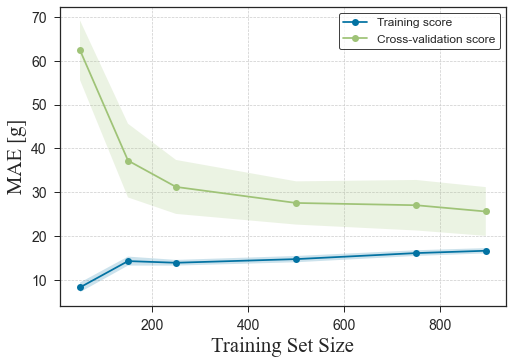

In [6]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)

plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE [g]", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('hahistLC', bbox_inches="tight")
plt.show()
# csfont = {'fontname':'Times New Roman'}    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]),**csfont)
# plt.xlabel("Training Set Size",**csfont)
# plt.ylabel("RMS Error",**csfont)
# plt.legend(loc="best")
# plt.show()

In [7]:
pd.DataFrame(test_mean)

,0
0,62.420769
1,37.200292
2,31.183089
3,27.520632
4,27.002243
5,25.569963


In [4]:
Data=pd.read_csv('1000_sample.csv')
X = Data[Data.columns[1:23]]
y = Data[ Data.columns[23]]
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=24)

In [5]:
X = X.to_numpy()
y = y.to_numpy()


In [6]:
y_Test=y_Test.to_numpy()

In [7]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 61.213387



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 69.834577



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 58.098901



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 42.176302



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 76.996301



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 62.412937



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 37.077208



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 77.092119



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 68.650992



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 66.302152

___________________________________
|error COV  |  2.275164328566113 | 
|error mean |  19.59223448899243| 
|error std  |  44.575553026258305|
___________________________________


# train score

In [8]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

___________________________________
|error COV  |  2.1964248323051 | 
|error mean |  17.353117780319646| 
|error std  |  38.11481881060923|
___________________________________


NameError: name 'leg' is not defined

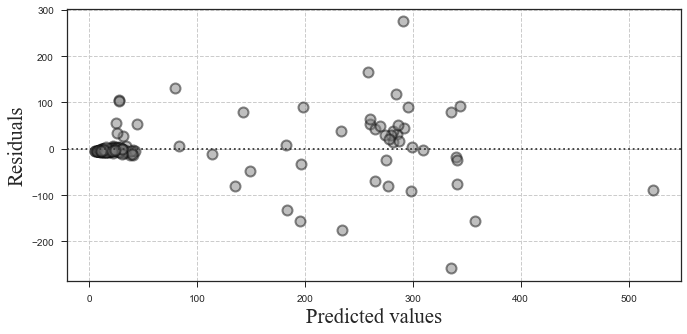

In [12]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,3.309506
std,41.752632
min,-250.207958
25%,-1.812695
50%,-0.090667
75%,2.494792
max,248.947464


In [13]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-3.062194
std,48.614297
min,-292.127927
25%,-2.549779
50%,-0.232721
75%,2.549340
max,246.339601


In [48]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('histunseen.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('histtrain.csv')

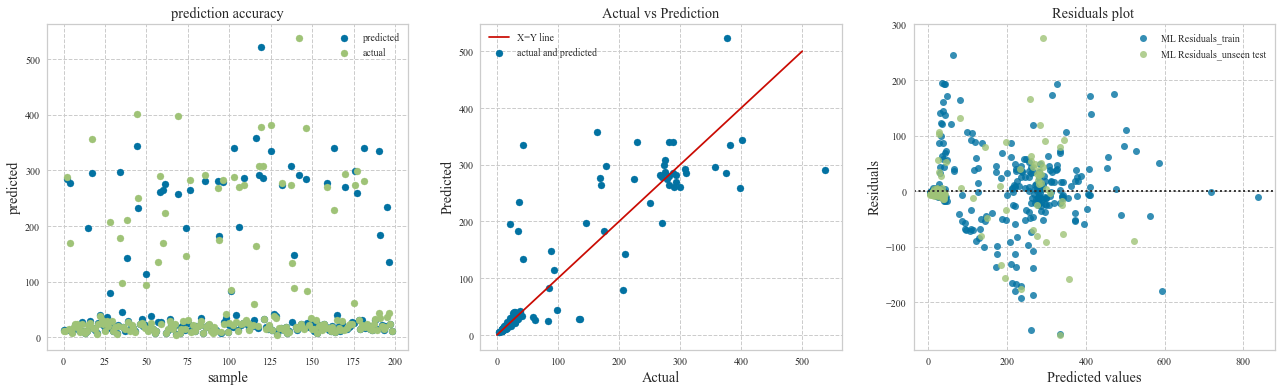

In [119]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,500],[0,500],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# XG

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
import xgboost as xg
from sklearn.compose import TransformedTargetRegressor

In [11]:
Data=pd.read_csv('1000_sample.csv')
X = Data[Data.columns[1:23]]
y = Data[ Data.columns[23]]

In [122]:
param_tuning = {
        'learning_rate': [0.04,0.05],
        'max_depth': [4,5],
        'min_child_weight': [15,16,17],
        'subsample': [0.55],
         'gamma'  : [0.05,0.075],
        'colsample_bytree': [0.75,0.8],
        'n_estimators' : [50,70,90]}

In [124]:
dd=QuantileTransformer(output_distribution='normal')
yv=y.to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)
rf = xg.XGBRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_tuning, n_iter = 400, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,yt)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 144 is smaller than n_iter=400. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.8min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_meth

In [125]:
rf_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.075, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=15, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.55,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
modo=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.075, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.025, max_delta_step=0, max_depth=3,
             min_child_weight=15, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)
mod= TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [13]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [12]:
y_actual = []
predict = []
Data=pd.read_csv('1000_sample.csv')
X = Data[Data.columns[1:23]]
y = Data[ Data.columns[23]]
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=24)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])


C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings

<Figure size 576x396 with 0 Axes>

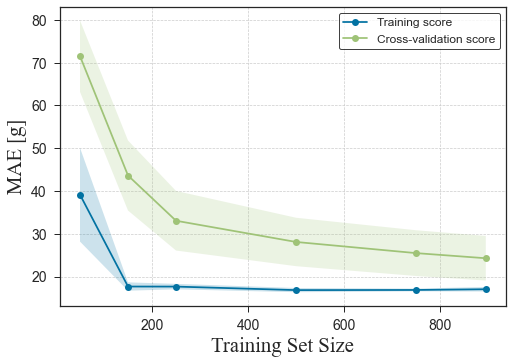

In [13]:

# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE [g]", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('headacc_xgLC', bbox_inches="tight")
plt.show()

In [14]:
pd.DataFrame(test_mean)

,0
0,71.523925
1,43.609831
2,33.038923
3,28.078254
4,25.471258
5,24.275116


In [14]:
y_actual = []
predict = []
Data=pd.read_csv('1000_sample.csv')
X = Data[Data.columns[1:23]]
y = Data[ Data.columns[23]]
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=24)

In [15]:
X = X.to_numpy()
y = y.to_numpy()

In [16]:
y_Test=y_Test.to_numpy()

In [17]:
kf=cv
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 61.170415



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 66.366569



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 60.143954



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 37.661458



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 78.774794



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (716). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 57.738960



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 28.745186



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 74.731982



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 70.574636



C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (717). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Root Mean squared error: 55.290083

___________________________________
|error COV  |  2.3049876234638877 | 
|error mean |  18.439304862956906| 
|error std  |  42.50236949439315|
___________________________________


# train score

In [18]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

___________________________________
|error COV  |  2.245414583809318 | 
|error mean |  18.174448711093355| 
|error std  |  40.80917218858348|
___________________________________


In [24]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,4.052971
std,44.493453
min,-232.861560
25%,-1.826238
50%,-0.027516
75%,2.028773
max,242.582820


In [25]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-2.697290
std,46.269477
min,-249.777791
25%,-2.229885
50%,-0.229789
75%,2.306716
max,250.212941


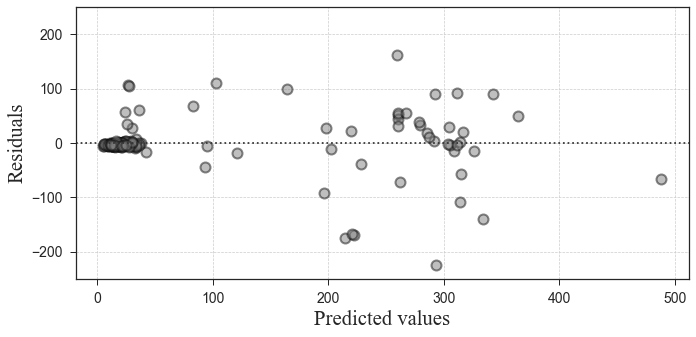

In [22]:
plt.figure(figsize=(11, 5))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
# a=sns.residplot(y=abs(y), x=abs(ytr),label='Train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='Test',scatter_kws={"s": 100,"facecolor": 'grey',"linewidth":2,"edgecolors": 'k',"alpha":0.5})
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

# leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
# leg.get_frame().set_linewidth(1)
# leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([15,80])
plt.ylim([-250,250])
plt.savefig('headacc_res', bbox_inches="tight")
plt.show()

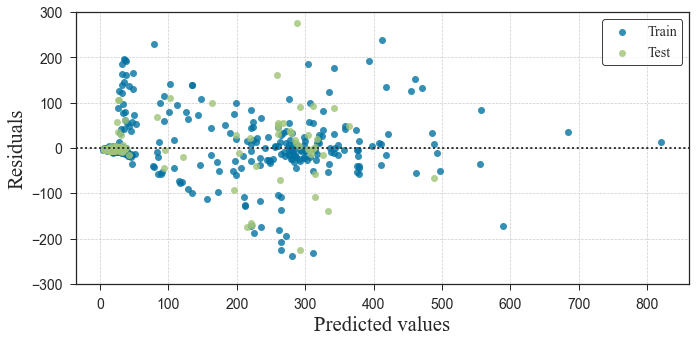

In [39]:
plt.figure(figsize=(11, 5))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
a=sns.residplot(y=(y), x=(ytr),label='Train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='Test')
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([15,820])
plt.ylim([-300,300])
plt.savefig('headacc_res', bbox_inches="tight")
plt.show()

In [75]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('Xunseen.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('Xtrain.csv')

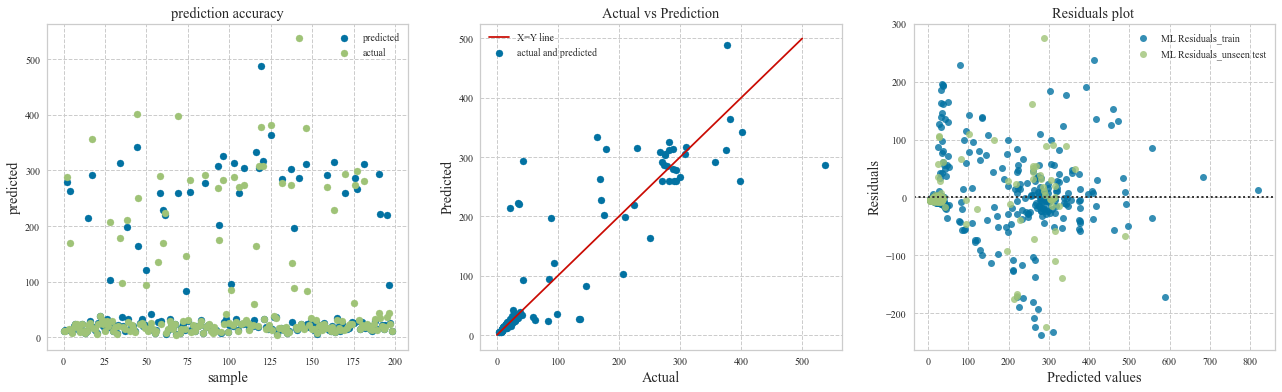

In [268]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,500],[0,500],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=(y), x=(ytr),label='ML Residuals_train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()